In [37]:
import os

import numpy as np
from PIL import Image

from dm_control import mujoco
from dm_control.mujoco.wrapper.mjbindings import enums
from dm_control import mjcf

import mediapy as media

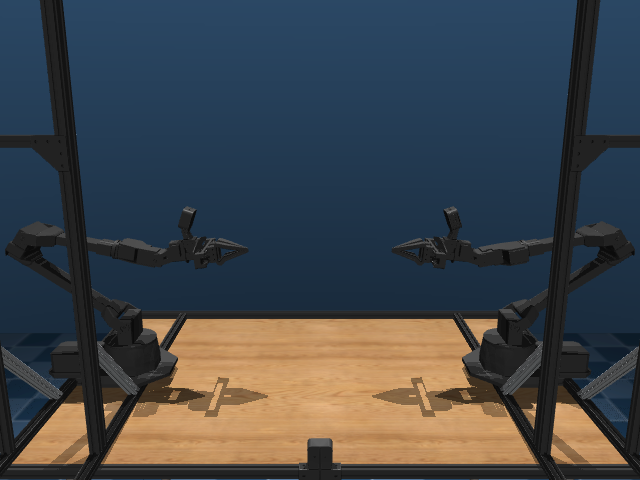

In [14]:
physics = mujoco.Physics.from_xml_path('/Users/timii/Developer/repositories/mujoco_menagerie/aloha/scene.xml')
physics.reset(0)
pixels = physics.render(height=480, width=640, camera_id=0) # Total of 6 cameras
Image.fromarray(pixels)

In [ ]:
print('Joint Positions:', physics.named.data.qpos) # For each arm, 6dof with 2 finger joints
print('\n')
print('Joint Velocities:', physics.named.data.qvel)

Joint Positions: FieldIndexer(qpos):
 0         left/waist [ 0       ]
 1      left/shoulder [-0.96    ]
 2         left/elbow [ 1.16    ]
 3  left/forearm_roll [ 0       ]
 4   left/wrist_angle [-0.3     ]
 5  left/wrist_rotate [ 0       ]
 6   left/left_finger [ 0.0084  ]
 7  left/right_finger [ 0.0084  ]
 8        right/waist [ 0       ]
 9     right/shoulder [-0.96    ]
10        right/elbow [ 1.16    ]
11 right/forearm_roll [ 0       ]
12  right/wrist_angle [-0.3     ]
13 right/wrist_rotate [ 0       ]
14  right/left_finger [ 0.0084  ]
15 right/right_finger [ 0.0084  ]


Joint Velocities: FieldIndexer(qvel):
 0         left/waist [ 0       ]
 1      left/shoulder [ 0       ]
 2         left/elbow [ 0       ]
 3  left/forearm_roll [ 0       ]
 4   left/wrist_angle [ 0       ]
 5  left/wrist_rotate [ 0       ]
 6   left/left_finger [ 0       ]
 7  left/right_finger [ 0       ]
 8        right/waist [ 0       ]
 9     right/shoulder [ 0       ]
10        right/elbow [ 0       ]
11 ri

In [22]:
physics.named.data.ctrl # 7dof, 6 for the arm and 1 for the gripper

FieldIndexer(ctrl):
 0         left/waist [ 0       ]
 1      left/shoulder [-0.96    ]
 2         left/elbow [ 1.16    ]
 3  left/forearm_roll [ 0       ]
 4   left/wrist_angle [-0.3     ]
 5  left/wrist_rotate [ 0       ]
 6       left/gripper [ 0.0084  ]
 7        right/waist [ 0       ]
 8     right/shoulder [-0.96    ]
 9        right/elbow [ 1.16    ]
10 right/forearm_roll [ 0       ]
11  right/wrist_angle [-0.3     ]
12 right/wrist_rotate [ 0       ]
13      right/gripper [ 0.0084  ]

In [ ]:
physics.named.model.actuator_ctrlrange

FieldIndexer(actuator_ctrlrange):
 0         left/waist [-3.14      3.14    ]
 1      left/shoulder [-1.85      1.26    ]
 2         left/elbow [-1.76      1.61    ]
 3  left/forearm_roll [-3.14      3.14    ]
 4   left/wrist_angle [-1.87      2.23    ]
 5  left/wrist_rotate [-3.14      3.14    ]
 6       left/gripper [ 0.002     0.037   ]
 7        right/waist [-3.14      3.14    ]
 8     right/shoulder [-1.85      1.26    ]
 9        right/elbow [-1.76      1.61    ]
10 right/forearm_roll [-3.14      3.14    ]
11  right/wrist_angle [-1.87      2.23    ]
12 right/wrist_rotate [-3.14      3.14    ]
13      right/gripper [ 0.002     0.037   ]

In [33]:
duration = 5    # (seconds)
framerate = 30  # (Hz)

frames = []
physics.reset(0)
while physics.data.time < duration:
  physics.data.ctrl = np.zeros(14)
  physics.step()
  if len(frames) < (physics.data.time) * framerate:
    pixels = physics.render(camera_id=0, height=480, width=640)
    frames.append(pixels)

media.show_video(frames, fps=framerate)

In [ ]:
duration = 5    # (seconds)
framerate = 30  # (Hz)

frames = []
physics.reset(0)
while physics.data.time < duration:
  physics.data.ctrl = physics.model.actuator_ctrlrange[:, 1] # Set the control to the maximum value
  physics.step()
  if len(frames) < (physics.data.time) * framerate:
    pixels = physics.render(camera_id=0, height=480, width=640)
    frames.append(pixels)

media.show_video(frames, fps=framerate)

In [105]:
# Add object to the scene
# Maybe just add a box, or find out how other envs added lego bricks

# Add a box to the scene
# box = mjcf.RootElement()
# box.default.joint.type = 'free'
# box.default.geom.type = 'box'
# box.default.geom.rgba = (1, 0, 0, 1)
# box.default.geom.size = (0.1, 0.1, 0.1)
# box.default.geom.pos = (0, 0, 0.1)

def make_box(size, rgba):
    random_state = np.random.RandomState(42)
    rgba = random_state.uniform([0, 0, 0, 1], [1, 1, 1, 1])
    model = mjcf.RootElement()
    model.worldbody.add('geom', name='my_box', type='box', size=size, rgba=rgba)
    return model

# physics = mjcf.Physics.from_mjcf_model(mjcf_model)
# physics.reset(0)
# pixels = physics.render(height=480, width=640, camera_id=2) # Total of 6 cameras
# Image.fromarray(pixels)

  # Attach to the arena at the spawn sites, with a free joint.



mjcf_model = mjcf.from_path('/Users/timii/Developer/repositories/mujoco_menagerie/aloha/scene.xml', escape_separators=True)
# box_body = mjcf_model.worldbody.add('body', name='my_box', pos=[0, 0, 0.3])
# box_body.add('geom', type='box', size=[0.1, 0.1, 0.1], rgba=[0, 1, 0, 1], density=1000)
# box_body.add('freejoint')
spawn_site = mjcf_model.worldbody.add('site', pos=[0, 0, 0.31], group=3)
model = make_box([0.1, 0.1, 0.1], [0, 1, 0, 1])
spawn_site.attach(model).add('freejoint')

physics = mjcf.Physics.from_mjcf_model(mjcf_model)

duration = 5    # (seconds)
framerate = 30  # (Hz)
frames = []

physics.reset(0)
while physics.data.time < duration:
  physics.data.ctrl = physics.model.actuator_ctrlrange[:, 1] # Set the control to the maximum value
  physics.step()
  if len(frames) < (physics.data.time) * framerate:
    pixels = physics.render(camera_id=0, height=480, width=640)
    frames.append(pixels)

media.show_video(frames, fps=framerate)

ValueError: Compile error raised by Mujoco; run again with --pymjcf_debug for additional debug information.
Error: keyframe 0: invalid qpos size, expected length 23
Element name 'neutral_pose', id 0

# Using Vision Languange Action Model for Control

In [ ]:
# import openpi